# Let use the tools on some dataset

I am going to cheat a little, I am going to use a dataset from http://data.gov.my, and I converted the data into csv. The data is in http://www.data.gov.my/data/ms_MY/dataset/senarai-terkini-sekolah/resource/e02dbc93-84ff-4a7c-b6a3-e7d15ea30b86

I have do a few thing to the dataset

* Converted into csv because there should be as few layer as possible to process the data
* remove the first line, because data should be processed, the first line going to mess things up

Otherwise this is a very good quality dataset from the malaysian government

In [1]:
import csv

In [2]:
f = open("sekolahrendahdanmenengahmac2015.csv")
reader = csv.reader(f)

Let see what field they have

In [3]:
header = next(reader)
print(header)

['Bil', 'Peringkat Sekolah', 'PPD', 'Kod Sekolah', 'NamaSekolah', 'AlamatSurat', 'PoskodSurat', 'BandarSurat', 'Negeri', 'NoTelefon', 'NoFax']


So we can find some pretty cool school info. Now let's reset.

In [4]:
f = open("sekolahrendahdanmenengahmac2015.csv")
reader = csv.DictReader(f)

Let's aggreate school by state

In [5]:
aggregated = {}

for item in reader:
    count = aggregated.get(item["Negeri"], 0)
    count = count + 1
    aggregated[item["Negeri"]] = count
    
print(aggregated)

{'SABAH': 1290, 'SARAWAK': 1452, 'WP PUTRAJAYA': 25, 'TERENGGANU': 499, 'WP KUALA LUMPUR': 304, 'MELAKA': 313, 'PERAK': 1098, 'SELANGOR': 930, 'PULAU PINANG': 398, 'KELANTAN': 592, 'PERLIS': 104, 'WP LABUAN': 27, 'PAHANG': 731, 'NEGERI SEMBILAN': 473, 'JOHOR': 1178, 'KEDAH': 745}


Not exactly easy to read. Let's try to visualize this. But matplotlib need a different datastructure

In [6]:
y = []
x_label = []


for key, value in aggregated.items():
    x_label.append(key)
    y.append(value)

x = range(1, len(x_label) + 1)
print(x)
print(y)
    

range(1, 17)
[1290, 1452, 25, 499, 304, 313, 1098, 930, 398, 592, 104, 27, 731, 473, 1178, 745]


Now we plot

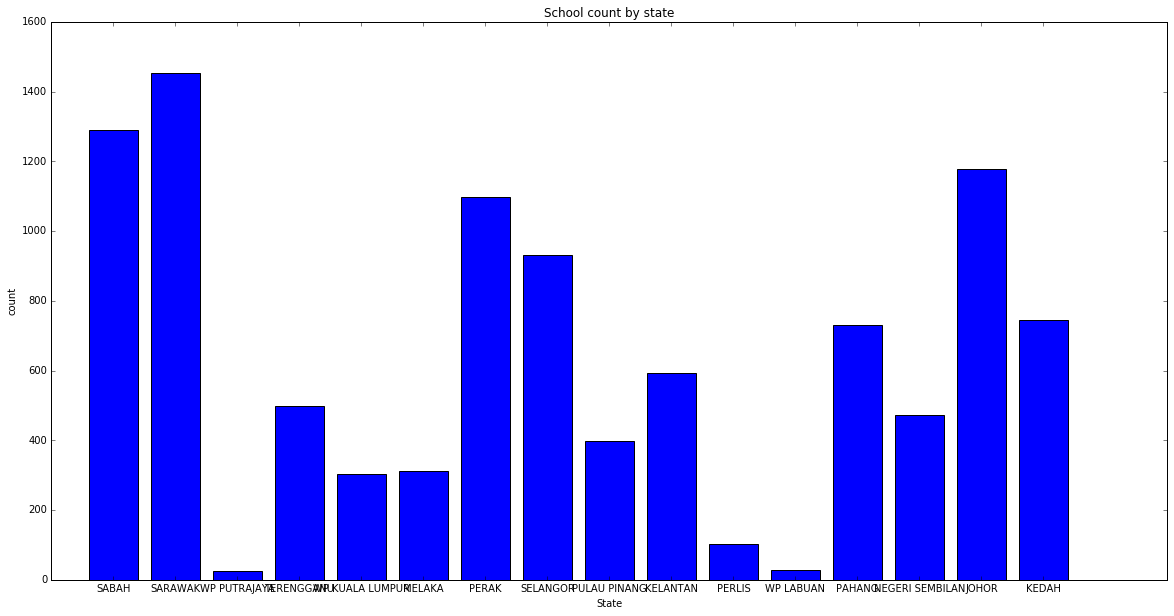

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)


plt.bar(x, y, align='center')
plt.xticks(x, x_label)
plt.title("School count by state")
plt.ylabel("count")
plt.xlabel("State")

This is hard to read

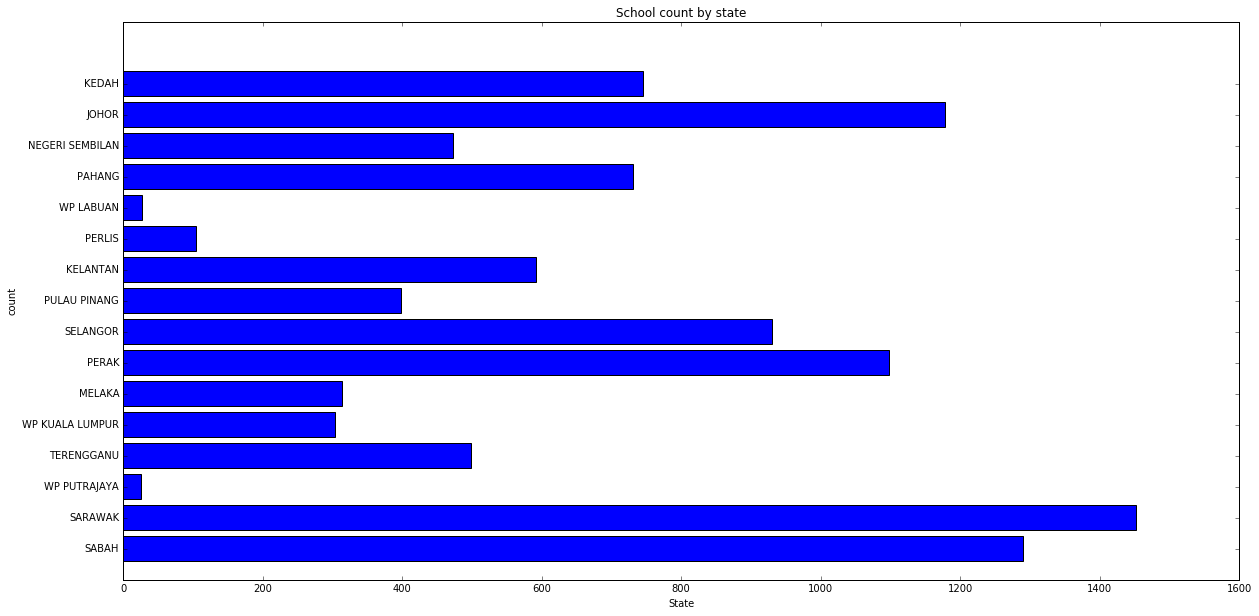

In [8]:
plt.figure(figsize=(20, 10), dpi=300)
plt.barh(x, y, align='center')
plt.yticks(x, x_label)
plt.title("School count by state")
plt.ylabel("count")
plt.xlabel("State")

Fascinating, perlis have a lot more school than kedah. Oh well, we figure out later, not within scope of today. Also let's reset, because csv return a iterator, once loop done. All is done. 

In [9]:
f = open("sekolahrendahdanmenengahmac2015.csv")
reader = csv.DictReader(f)

In [10]:
aggregated_two = {}

for item in reader:
    data = aggregated_two.get(item["Negeri"], {"Rendah":0, "Menengah":0})
    count = data[item["Peringkat Sekolah"]] 
    count = count + 1
    data[item["Peringkat Sekolah"]] = count
    aggregated_two[item["Negeri"]] = data

print(aggregated_two)

{'SABAH': {'Rendah': 1071, 'Menengah': 219}, 'SARAWAK': {'Rendah': 1265, 'Menengah': 187}, 'WP PUTRAJAYA': {'Rendah': 14, 'Menengah': 11}, 'TERENGGANU': {'Rendah': 352, 'Menengah': 147}, 'WP KUALA LUMPUR': {'Rendah': 202, 'Menengah': 102}, 'MELAKA': {'Rendah': 236, 'Menengah': 77}, 'PERAK': {'Rendah': 852, 'Menengah': 246}, 'SELANGOR': {'Rendah': 655, 'Menengah': 275}, 'PULAU PINANG': {'Rendah': 271, 'Menengah': 127}, 'KELANTAN': {'Rendah': 418, 'Menengah': 174}, 'PERLIS': {'Rendah': 74, 'Menengah': 30}, 'WP LABUAN': {'Rendah': 17, 'Menengah': 10}, 'PAHANG': {'Rendah': 537, 'Menengah': 194}, 'NEGERI SEMBILAN': {'Rendah': 349, 'Menengah': 124}, 'JOHOR': {'Rendah': 904, 'Menengah': 274}, 'KEDAH': {'Rendah': 545, 'Menengah': 200}}


Again this is hard to read

In [11]:
import numpy
x_label = []
y_rendah = []
y_menengah = []

for key, value in aggregated_two.items():
    x_label.append(key)
    y_rendah.append(value["Rendah"])
    y_menengah.append(value["Menengah"])

x = numpy.arange(len(x_label))

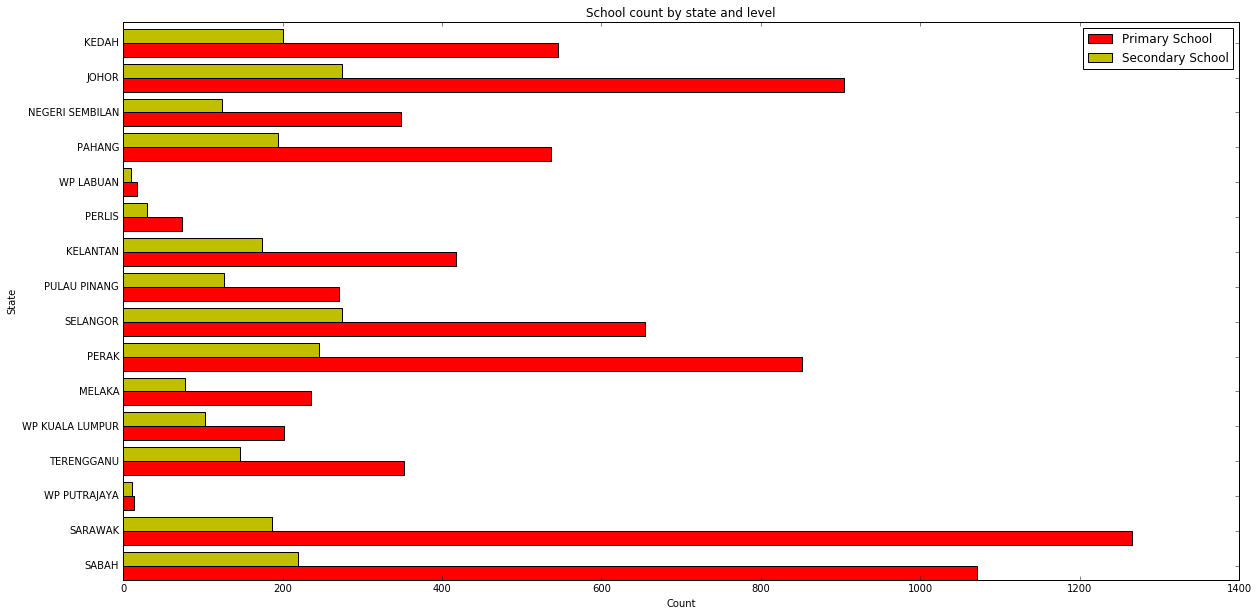

In [12]:

width = 0.40
fig, ay = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

rect1 = ay.barh(x, y_rendah, width, color='r', label="Primary School")

rect2 = ay.barh(x + width, y_menengah, width, color='y', label="Secondary School")

plt.ylabel("State")
plt.xlabel("Count")
plt.yticks(x + width, x_label)
plt.legend()
plt.title("School count by state and level")
plt.figure(figsize=(20, 10), dpi=300)

